# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [168]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
load_dotenv()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Jamel\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [169]:
# Read your api key environment variable
api_key = os.getenv("news_api")


In [170]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)


In [171]:
# Fetch the Bitcoin news articles
Bitcoin_articles = newsapi.get_everything(q="Bitcoin", language="en", sort_by="relevancy")


In [172]:
# Print total articles
print(f"articles about Bitcoin: {Bitcoin_articles['totalResults']}")

articles about Bitcoin: 8832


In [173]:
# Show sample article
Bitcoin_articles["articles"][0]

{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Kris Holt',
 'title': 'New York passes a bill to limit bitcoin mining',
 'description': "New York lawmakers have passed a bill\r\n that would temporarily ban new bitcoin\r\n mining operations. Early on Friday, state senators voted 36-27 to pass the legislation. It's now bound for the desk of Governor Kathy Hochul, who will sign it into law or veto th…",
 'url': 'https://www.engadget.com/new-york-cryptocurrency-bill-bitcoin-mining-climate-change-161126292.html',
 'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-05/a8217250-bdfa-11eb-bfc4-2663225cea83',
 'publishedAt': '2022-06-03T16:11:26Z',
 'content': "New York lawmakers have passed a bill\r\n that would temporarily ban new bitcoin\r\n mining operations. Early on Friday, state senators voted 36-27 to pass the legislation. It's now bound for the desk of… [+2036 chars]"}

In [174]:
# Fetch the Ethereum news articles
Ethereum_articles = newsapi.get_everything(q="Ethereum", language="en", sort_by="relevancy")


In [175]:
# Print total articles
print(f"articles about Ethereum: {Ethereum_articles['totalResults']}")

articles about Ethereum: 4344


In [176]:
# Show sample article
Ethereum_articles["articles"][0]

{'source': {'id': None, 'name': 'Gizmodo.com'},
 'author': 'Kyle Barr',
 'title': 'GameStop Dunks Its Head Into the Crypto Kiddie Pool',
 'description': 'GameStop has officially thrown itself headlong into the web3 vipers nest with a new app release, though it’s hard to say whether its proposed population of gamers and game developers will take up the company on its belated, head-first jump into the crypto sph…',
 'url': 'https://gizmodo.com/gamestop-crypto-nft-wallet-blockchain-1848965386',
 'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/cd4c128b4182d7b2fba8152d7bb35733.jpg',
 'publishedAt': '2022-05-23T21:35:00Z',
 'content': 'GameStop has officially thrown itself headlong into the web3 vipers nest with a new app release, though its hard to say whether its proposed population of gamers and game developers will take up the … [+3255 chars]'}

In [177]:
# Create the Bitcoin sentiment scores DataFrame
Bitcoin_sentiments = []

for article in Bitcoin_articles["articles"]:
    try:
        title = article["title"]
        description = article["description"]
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Bitcoin_sentiments.append({
            "title": title,
            "description": description,
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass 



In [178]:
Bitcoin_df = pd.DataFrame(Bitcoin_sentiments) 


# Reorder DataFrame columns
cols = ["date","title","description","text", "compound", "positive", "negative", "neutral"]
Bitcoin_df = Bitcoin_df[cols]
Bitcoin_df.head()


,date,title,description,text,compound,positive,negative,neutral
0,2022-06-03,New York passes a bill to limit bitcoin mining,New York lawmakers have passed a bill\r\n that...,New York lawmakers have passed a bill\r\n that...,-0.5574,0.000,0.098,0.902
1,2022-06-09,Jay-Z and Jack Dorsey Launch Bitcoin Academy f...,"Rapper and entrepreneur Shawn Carter, better k...","Rapper and entrepreneur Shawn Carter, better k...",0.4404,0.077,0.000,0.923
2,2022-06-08,Bitcoin Wasn't as Decentralized or Anonymous a...,A new study on bitcoin calls into question whe...,A new study on bitcoin calls into question whe...,0.5267,0.124,0.000,0.876
3,2022-06-05,Why the Central African Republic adopted Bitcoin,Some 90% of people in the Central African Repu...,"Image caption, President Faustin-Archange Toua...",0.5106,0.164,0.000,0.836
4,2022-06-02,Chipotle now accepts cryptocurrency payments,You can now reportedly pay for your burritos a...,You can now reportedly pay for your burritos a...,-0.1027,0.000,0.040,0.960


In [179]:
# Create the Ethereum sentiment scores DataFrame
Ethereum_sentiments = []

for article in Ethereum_articles["articles"]:
    try:
        title = article["title"]
        description = article["description"]
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Ethereum_sentiments.append({
            "title": title,
            "description": description,
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

In [180]:
Ethereum_df = pd.DataFrame(Ethereum_sentiments)


# Reorder DataFrame columns
cols = ["date","title","description","text", "compound", "positive", "negative", "neutral"]
Ethereum_df = Ethereum_df[cols]
Ethereum_df.head()

,date,title,description,text,compound,positive,negative,neutral
0,2022-05-23,GameStop Dunks Its Head Into the Crypto Kiddie...,GameStop has officially thrown itself headlong...,GameStop has officially thrown itself headlong...,-0.1027,0.000,0.040,0.960
1,2022-05-23,GameStop Launching Digital Wallet for Cryptocu...,The self-custodial Ethereum wallet will have i...,GameStop is going all-in on crypto. The video ...,0.1280,0.046,0.000,0.954
2,2022-06-07,PayPal Lets Users Transfer Bitcoin and Ethereu...,PayPal announced on Tuesday that the service n...,The ability to conduct external transfers on P...,0.3182,0.059,0.000,0.941
3,2022-06-09,MoonDAO Will Pick 2 of the Next Blue Origin As...,A community of cryptocurrency enthusiasts crow...,"A decentralized autonomous organization, or DA...",0.5859,0.134,0.000,0.866
4,2022-06-09,It’s Time To Get Interested In Ethereum Again,The Winklevoss twins are cutting the staff at ...,"Crypto Winter It May Be, But Ethereum Looks Li...",0.3612,0.081,0.044,0.875


In [181]:
# Describe the Bitcoin Sentiment
Bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.001340,0.063550,0.059100,0.877400
std,0.429359,0.061631,0.069485,0.086397
min,-0.859300,0.000000,0.000000,0.646000
25%,-0.322475,0.000000,0.000000,0.837500
50%,0.000000,0.049000,0.053000,0.888500
75%,0.387625,0.116500,0.087500,0.928750
max,0.585900,0.187000,0.300000,1.000000


In [182]:
# Describe the Ethereum Sentiment
Ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.017460,0.051800,0.056200,0.892150
std,0.435734,0.047295,0.087082,0.085361
min,-0.948500,0.000000,0.000000,0.628000
25%,-0.396450,0.000000,0.000000,0.861250
50%,0.012900,0.052500,0.039500,0.909500
75%,0.376275,0.081500,0.088250,0.955000
max,0.585900,0.135000,0.372000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Bitcoin had the highest score. 

Q. Which coin had the highest positive score?

A: Bitcoin had the highest positive score. 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [183]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import pandas as pd

In [184]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()



# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_expand = {'ok', 'another', 'move', 'always', 'find', 'never', 'meet','n'}


In [185]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text

    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)

   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    # Remove the stop words
    filtered_words = [word for word in sw if word not in stopwords.words('english')]
    
    return tokens

In [186]:
# Create a new tokens column for Bitcoin
Bitcoin_df['tokens'] = Bitcoin_df['text'].apply(word_tokenize)
Bitcoin_df.head()

,date,title,description,text,compound,positive,negative,neutral,tokens
0,2022-06-03,New York passes a bill to limit bitcoin mining,New York lawmakers have passed a bill\r\n that...,New York lawmakers have passed a bill\r\n that...,-0.5574,0.000,0.098,0.902,"[New, York, lawmakers, have, passed, a, bill, ..."
1,2022-06-09,Jay-Z and Jack Dorsey Launch Bitcoin Academy f...,"Rapper and entrepreneur Shawn Carter, better k...","Rapper and entrepreneur Shawn Carter, better k...",0.4404,0.077,0.000,0.923,"[Rapper, and, entrepreneur, Shawn, Carter, ,, ..."
2,2022-06-08,Bitcoin Wasn't as Decentralized or Anonymous a...,A new study on bitcoin calls into question whe...,A new study on bitcoin calls into question whe...,0.5267,0.124,0.000,0.876,"[A, new, study, on, bitcoin, calls, into, ques..."
3,2022-06-05,Why the Central African Republic adopted Bitcoin,Some 90% of people in the Central African Repu...,"Image caption, President Faustin-Archange Toua...",0.5106,0.164,0.000,0.836,"[Image, caption, ,, President, Faustin-Archang..."
4,2022-06-02,Chipotle now accepts cryptocurrency payments,You can now reportedly pay for your burritos a...,You can now reportedly pay for your burritos a...,-0.1027,0.000,0.040,0.960,"[You, can, now, reportedly, pay, for, your, bu..."


In [187]:
# Create a new tokens column for Ethereum
Ethereum_df['tokens'] = Ethereum_df['text'].apply(word_tokenize)
Ethereum_df.head()

,date,title,description,text,compound,positive,negative,neutral,tokens
0,2022-05-23,GameStop Dunks Its Head Into the Crypto Kiddie...,GameStop has officially thrown itself headlong...,GameStop has officially thrown itself headlong...,-0.1027,0.000,0.040,0.960,"[GameStop, has, officially, thrown, itself, he..."
1,2022-05-23,GameStop Launching Digital Wallet for Cryptocu...,The self-custodial Ethereum wallet will have i...,GameStop is going all-in on crypto. The video ...,0.1280,0.046,0.000,0.954,"[GameStop, is, going, all-in, on, crypto, ., T..."
2,2022-06-07,PayPal Lets Users Transfer Bitcoin and Ethereu...,PayPal announced on Tuesday that the service n...,The ability to conduct external transfers on P...,0.3182,0.059,0.000,0.941,"[The, ability, to, conduct, external, transfer..."
3,2022-06-09,MoonDAO Will Pick 2 of the Next Blue Origin As...,A community of cryptocurrency enthusiasts crow...,"A decentralized autonomous organization, or DA...",0.5859,0.134,0.000,0.866,"[A, decentralized, autonomous, organization, ,..."
4,2022-06-09,It’s Time To Get Interested In Ethereum Again,The Winklevoss twins are cutting the staff at ...,"Crypto Winter It May Be, But Ethereum Looks Li...",0.3612,0.081,0.044,0.875,"[Crypto, Winter, It, May, Be, ,, But, Ethereum..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 


In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [188]:
from collections import Counter
from nltk import ngrams

In [189]:
bit_tokenizer = tokenizer(text)
print(bit_tokenizer)

['youre', 'inexperienced', 'nfts', 'term', 'may', 'confusingim', 'fulltime', 'youtuber', 'focused', 'demystifying', 'thing', 'web', 'wa', 'first', 'learning', 'web', 'space', 'seemed', 'like', 'p', 'char']


In [190]:
# Generate the Bitcoin N-grams where N=2
def word_counter(corpus): 
    string = ' '.join(corpus.text)
    processed = tokenizer(string)
    bigrams = ngrams(processed, n=2)# Generate the Bitcoin N-grams where N=2
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])
    
word_counter(Bitcoin_df)

,bigram,count
0,"(may, reuters)",3
1,"(new, blockchain)",3
2,"(seth, greens)",3
3,"(bitcoin, mining)",2
4,"(digital, currency)",2
5,"(bitcoin, legal)",2
6,"(legal, tender)",2
7,"(pay, burrito)",2
8,"(char, terra)",2
9,"(blockchain, new)",2


In [191]:
# Generate the Ethereum N-grams where N=2

#Created a function above that generates generates the N-grams where N=2

word_counter(Ethereum_df)

,bigram,count
0,"(crypto, winter)",2
1,"(price, ethereum)",2
2,"(bill, would)",2
3,"(mining, operation)",2
4,"(p, char)",2
5,"(char, cryptocurrency)",2
6,"(cryptocurrency, boom)",2
7,"(boom, past)",2
8,"(past, year)",2
9,"(year, ha)",2


In [192]:
# Function token_count generates the top 10 words for a given coin

def token_count(tokens, N=10):

    """Returns the top N tokens from the frequency count"""

    return Counter(tokens).most_common(N)

In [193]:
# Use token_count to get the top 10 words for Bitcoin
top10_btc = ' '.join(Bitcoin_df.text)
processed_btc = tokenizer(top10_btc) 
token_count(processed_btc)

[('char', 20),
 ('bitcoin', 14),
 ('new', 8),
 ('blockchain', 6),
 ('cryptocurrency', 6),
 ('digital', 4),
 ('cryptocurrencies', 4),
 ('reuters', 4),
 ('world', 4),
 ('luna', 4)]

In [194]:
# Use token_count to get the top 10 words for Ethereum
top10_eth = ' '.join(Ethereum_df.text)
processed_eth = tokenizer(top10_eth) 
token_count(processed_eth)

[('char', 20),
 ('cryptocurrency', 8),
 ('ha', 6),
 ('ethereum', 5),
 ('new', 4),
 ('crypto', 4),
 ('market', 4),
 ('year', 4),
 ('nft', 4),
 ('web', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [209]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]


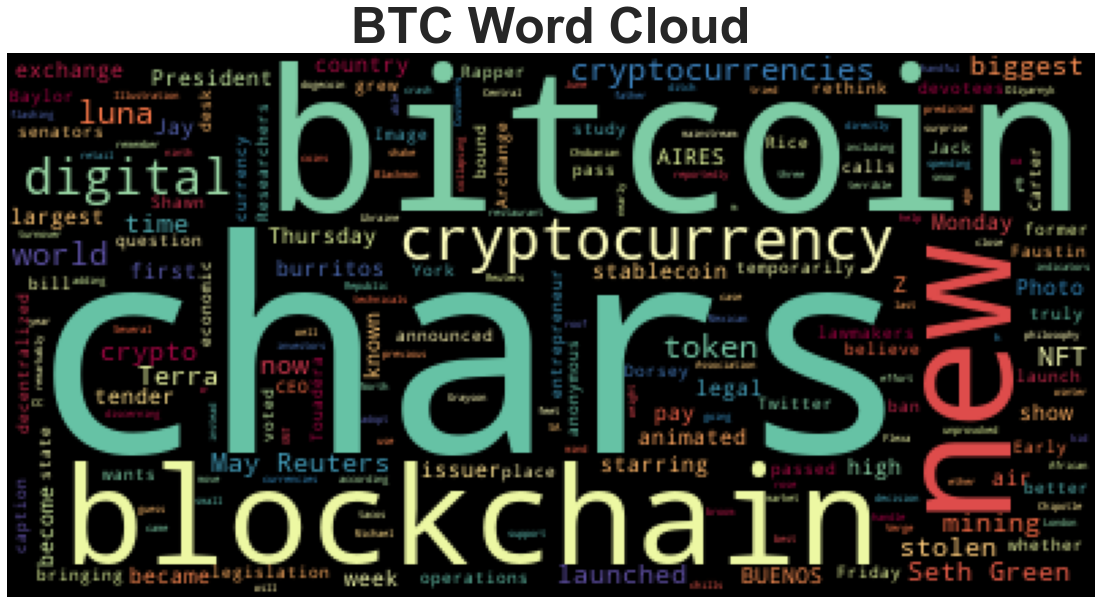

In [210]:
# Generate the Bitcoin word cloud
wordcloud = WordCloud(colormap="Spectral_r").generate(Bitcoin_df.text.str.cat())
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 50, "fontweight": "bold"}
plt.title("BTC Word Cloud", fontdict=fontdict)
plt.show()



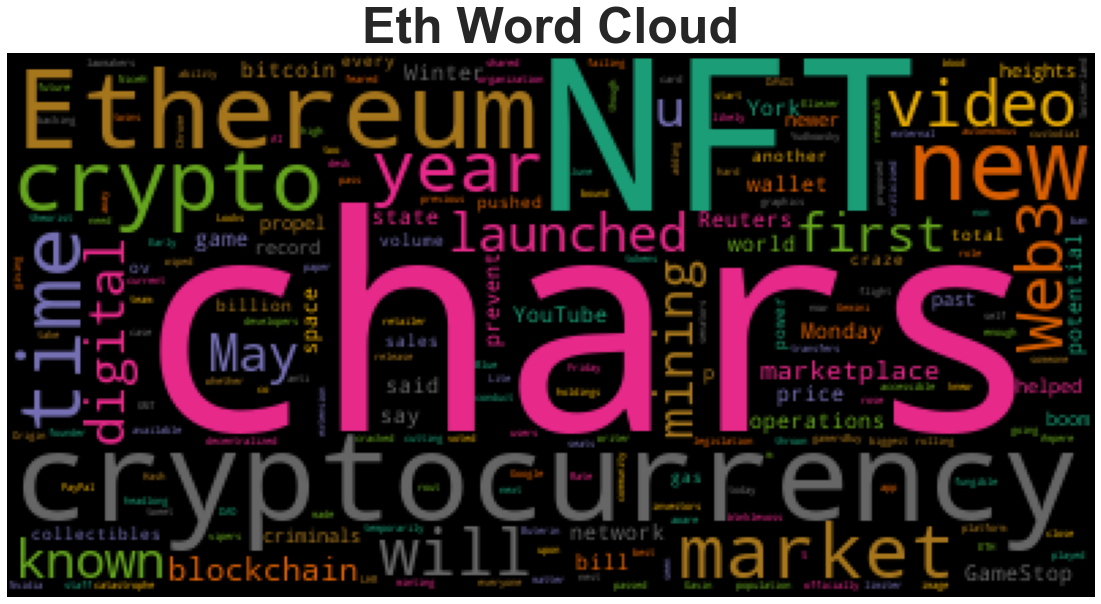

In [211]:
# Generate the Ethereum word cloud
wordcloud = WordCloud(colormap="Dark2_r").generate(Ethereum_df.text.str.cat())
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 50, "fontweight": "bold"}
plt.title("Eth Word Cloud", fontdict=fontdict)
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [212]:
import spacy
from spacy import displacy

In [213]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [214]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [215]:
# Concatenate all of the Bitcoin text together
bit_cat_text = Bitcoin_df.text.str.cat()
#bit_cat_text

In [216]:
# Run the NER processor on all of the text
btc_doc = nlp(bit_cat_text)
#btc_doc

# Add a title to the document
btc_doc.user_data['title'] = "Bitcoin NER"

In [217]:
# Render the visualization
options = {"compact": True, "color": "blue", "word_spacing": 25}
displacy.render(btc_doc, style='ent', options=options)

In [218]:
# List all Entities
for ent in btc_doc.ents:
    print(ent.text, ent.label_)

New York GPE
Friday DATE
36-27 CARDINAL
Shawn Carter PERSON
Jay-Z PERSON
Thursday DATE
Jay-Z PERSON
Jack Dorsey PERSON
Faustin-Archange Touadéra LAW
The Central African Republic's ORG
Bitcoin NORP
first ORDINAL
+1428 ORG
nearly three feet QUANTITY
Chipotle ORG
Grayson Blackmon PERSON
Oliyarnyk / CC-BY-SA-4.0 ORG
Michael Chobanian PERSON
the Blockchain Association of Ukraine ORG
6 CARDINAL
Reuters ORG
5.2% PERCENT
31,441.76 MONEY
GMT WORK_OF_ART
Monday DATE
1,552.78 MONEY
34.8% PERCENT
year DATE
Mexican NORP
North London LOC
a few weeks ago DATE
+2779 chars]May ORG
24 CARDINAL
Reuters ORG
its ninth week DATE
two CARDINAL
Seth Green's PERSON
Nike ORG
today DATE
Seth Green's PERSON
NFT ORG
Seth Green's PERSON
NFT ORG
Bankman-Fried PERSON
the digital asset exchange ORG
FTX ORG
Riot Blockchain PERSON
Marathon Digital Holdings ORG
first ORDINAL
September DATE
$36 million MONEY
over 50% PERCENT
Thursday DATE
May 30 DATE
Reuters ORG
Crypstation ORG
May 16 DATE
Reuters ORG
Monday DATE
the weeke

---

### Ethereum NER

In [219]:
# Concatenate all of the Ethereum text together
eth_cat_text = Ethereum_df.text.str.cat()
#eth_cat_text

In [220]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_cat_text)
eth_doc

# Add a title to the document
eth_doc.user_data['title'] = "Etheteum NER"

In [221]:
# Render the visualization
options = {"compact": True, "color": "blue", "word_spacing": 25}
displacy.render(eth_doc, style='ent', options=options)

In [222]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

GameStop ORG
web3 LOC
Ethereum ORG
Monday DATE
Google Chrome PRODUCT
PayPal ORG
today DATE
U.S. GPE
DAO ORG
two CARDINAL
Blue Origin ORG
first ORDINAL
Gemini ORG
Ethereum (Cryptocurrency ORG
chars]New York GPE
Friday DATE
36-27 CARDINAL
Switzerland GPE
May 25 DATE
Reuters ORG
Gavin Wood PERSON
Nvidia ORG
Ampere Lite Hash Rate WORK_OF_ART
LHR ORG
Ethereum ORG
6 CARDINAL
Reuters ORG
5.2% PERCENT
31,441.76 MONEY
GMT WORK_OF_ART
Monday DATE
1,552.78 MONEY
34.8% PERCENT
year DATE
Buterin PERSON
AI ORG
Eliezer Yudkowsky PERSON
Elon Musk PERSON
YouTube ORG
the past few years DATE
NFT ORG
$29 billion MONEY
several years ago DATE
NFT ORG
Kim Kardashian PERSON
Floyd Mayweather PERSON
NBA ORG
Paul Pierce PERSON
Ether PERSON
+2773 chars]Solana GPE
third ORDINAL
10% PERCENT
Wednesday DATE
the past few years DATE
NFT ORG
$29 billion MONEY
6 CARDINAL
New York's GPE
Ukraine GPE
Ethereum ORG
Johnny PERSON
YouTuber ORG
first ORDINAL


---